In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../modules")

from HPIB_plot import *
from scipy.constants import e, k
from scipy.special import lambertw
from scipy.optimize import least_squares

2.631e-07
1.235


(1, 25.39225109330012)

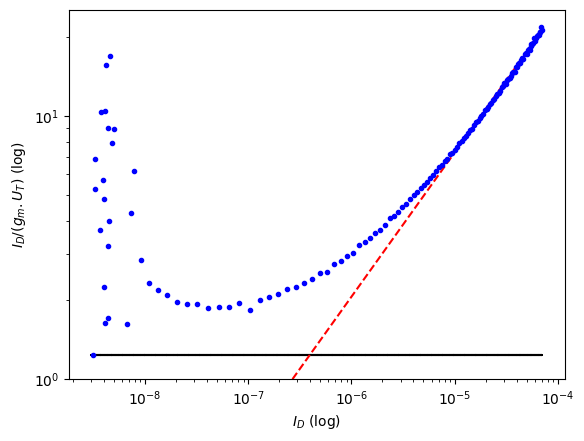

In [168]:
T=296
try: df=pd.read_csv(path, header=[0, 1])
except: print("Error opening VGS\n")
    
if df.columns.levels[1][0] != 'None':
    df.columns.levels[1][0] != ''

VD=float(df.columns.levels[1][0])
VG=getpd(df, 'Vg')
ID=getpd(df, 'Id')

if np.average(ID) < 0:
    VD=-VD
    VG=-VG
    ID=-ID

if 'gm' not in df.columns:
    gm=(np.diff(df['Id'].T)/np.diff(df['Vg'].T)).T
    gm=np.append([gm[0]], gm)

    header=pd.MultiIndex.from_product([['gm'],
                                df['Vg'].columns])

    df2=pd.DataFrame(data=gm, columns=header)
    df=pd.concat((df, df2), axis=1)

    df.to_csv(path, index=False, float_format='%.5E')
else:
    gm=getpd(df, 'gm')

if 'dgm' not in df.columns:
    dgm=(np.diff(df['gm'].T)/np.diff(df['Vg'].T)).T
    dgm=np.append(dgm, [dgm[-1]])

    header=pd.MultiIndex.from_product([['dgm'],
                                df['Vg'].columns])

    df2=pd.DataFrame(data=dgm, columns=header)
    df=pd.concat((df, df2), axis=1)

    df.to_csv(path, index=False, float_format='%.5E')
else:
    dgm=getpd(df, 'dgm')

plt.close('all')

Ut=k*T/e

y=ID/(gm*Ut)
x=ID

fig = plt.figure()
ax=plt.gca() 
ax.set_yscale('log')
ax.set_xscale('log')

m, b = np.polyfit(np.log10(x[-10:]), np.log10(y[-10:]), 1, w=np.sqrt(y[-10:]))

Ispec=10**((-b)/m)
print(format(Ispec, '.3e'))
n=np.nanmin(y[y>0])
print(format(n, '.3f'))

ax.plot(x, np.array([n for c in x]), '--k')
ax.plot(x, y[-1]/(b * np.power(x[-1], m))*(b * np.power(x, m)), '--r')
ax.plot(x, y, '.b')

ax.set_ylabel('$I_D/(g_m.U_T)$ (log)')
ax.set_xlabel('$I_D$ (log)')

ax.set_ylim((1, 1.2*y[-1]))

1.4532905543785495


(0.04670989104917424, 1)

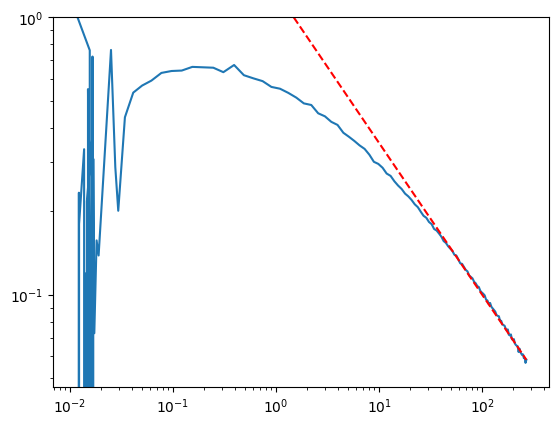

In [184]:
IC=ID/Ispec
Ut=k*T/e

y2=gm*n*Ut/ID

m, b= np.polyfit(np.log10(IC[-10:]), np.log10(y2[-10:]), 1)

fig = plt.figure()
ax=plt.gca() 
ax.set_yscale('log')
ax.set_xscale('log')

lamb=10**((-b)/m)
print(lamb)

ax.plot(IC, y2)
ax.plot(IC, y2[-1]/(b * np.power(IC[-1], m))*(b * np.power(IC, m)), '--r')

ax.set_ylim((0.8*y2[-1], 1))